In [88]:
import pandas as pd
import numpy as np
import glob as glb
from datetime import date, timedelta

- Collated n number of monthly stop and search data for all the constabularies which was available for on https://data.police.uk through a loop
- Mapped constabularies from file names
- Converted string date to month format
- Imputed NaNs with 'Not Known' flag
- Mapped self defined ethnicity to BAME, White & Not Known Buckets

In [89]:
path = r'C:/Users/Ritaban Dutta/Downloads/Stop and Search'
all_files = glb.glob(path + "\*-stop-and-search.csv")

li = []

for filename in all_files:

    df = pd.read_csv(filename, index_col=None, header=0,encoding='latin1')
    df['Place']=filename
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
data=frame.copy(deep=True)
data.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing,Place
0,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:/Users/Ritaban Dutta/Downloads/Stop and Sear...
1,Person search,2019-01-01T00:00:00+00:00,NaN,NaN,NaN,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:/Users/Ritaban Dutta/Downloads/Stop and Sear...
2,Person search,2019-01-01T00:30:00+00:00,NaN,NaN,51.350977,-2.979701,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,True,False,C:/Users/Ritaban Dutta/Downloads/Stop and Sear...
3,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,C:/Users/Ritaban Dutta/Downloads/Stop and Sear...
4,Person search,2019-01-01T01:35:00+00:00,NaN,NaN,51.471129,-2.589816,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Article for use in theft,NaN,NaN,False,C:/Users/Ritaban Dutta/Downloads/Stop and Sear...


In [90]:
data=data.rename(columns={'Type':'n_type'})

In [91]:
data['n_place'] = data['Place'].str.split('\\').str[6]


In [92]:
data['n_month']=data['Date'].str[0:7]

In [93]:
data['Part of a policing operation'].value_counts(dropna=False)
data['n_part_of_policing_operation']=np.where(data['Part of a policing operation']==True,'Part Of Policing Op','Not Known')
data['n_part_of_policing_operation']=np.where(data['Part of a policing operation']==False,'Not Part Of Policing Op',data['n_part_of_policing_operation'])
data['n_part_of_policing_operation'].value_counts(dropna=False)

Not Part Of Policing Op    839672
Not Known                  357136
Part Of Policing Op         30044
Name: n_part_of_policing_operation, dtype: int64

In [94]:
data['Outcome linked to object of search'].value_counts(dropna=False)
data['n_outcome_lnkd_to_obj_of_search']=np.where(data['Outcome linked to object of search']==True,'Obj Of Search Was Found','Not Known')
data['n_outcome_lnkd_to_obj_of_search']=np.where(data['Outcome linked to object of search']==False,'Obj Of Search Was Not Found',data['n_outcome_lnkd_to_obj_of_search'])
data['n_outcome_lnkd_to_obj_of_search'].value_counts(dropna=False)

Not Known                      872650
Obj Of Search Was Not Found    203027
Obj Of Search Was Found        151175
Name: n_outcome_lnkd_to_obj_of_search, dtype: int64

In [95]:
data['Gender'].value_counts(dropna=False)
data['n_gender']=np.where(data['Gender'].isna(),'Not Known',data['Gender'])
data['n_gender'].value_counts(dropna=False)

Male         1037374
Female        101111
Not Known      86247
Other           2120
Name: n_gender, dtype: int64

In [96]:
data['Age range'].value_counts(dropna=False)
data['n_age']=np.where(data['Age range'].isna(),'Not Known',data['Age range'])
data['n_age']=np.where(data['Age range']=='over 34','Over 34',data['n_age'])
data['n_age']=np.where(data['Age range']=='under 10','Under 10',data['n_age'])
data['n_age'].value_counts(dropna=False)

18-24        396074
25-34        260308
Over 34      214879
10-17        212153
Not Known    142849
Under 10        589
Name: n_age, dtype: int64

In [97]:
data['Self-defined ethnicity'].value_counts(dropna=False)

White - English/Welsh/Scottish/Northern Irish/British                                   490970
Other ethnic group - Not stated                                                         197813
White - Any other White background                                                       96206
Black/African/Caribbean/Black British - Any other Black/African/Caribbean background     85529
Black/African/Caribbean/Black British - African                                          65058
Asian/Asian British - Any other Asian background                                         53494
NaN                                                                                      49340
Black/African/Caribbean/Black British - Caribbean                                        43885
Asian/Asian British - Pakistani                                                          36042
Asian/Asian British - Bangladeshi                                                        24544
Other ethnic group - Any other ethnic group       

In [98]:
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['White - English/Welsh/Scottish/Northern Irish/British',
                                                                     'White - Any other White background',
                                                                     'White - Gypsy or Irish Traveller',
                                                                     'White - Irish']),'White','Not Known')
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Black/African/Caribbean/Black British - Any other Black/African/Caribbean background',
                                                                     'Black/African/Caribbean/Black British - African',
                                                                     'Black/African/Caribbean/Black British - Caribbean'
                                                                     ]),'BAME',data['n_self_def_eth'])
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Asian/Asian British - Any other Asian background',
                                                                     'Asian/Asian British - Pakistani',
                                                                     'Asian/Asian British - Bangladeshi',
                                                                     'Asian/Asian British - Indian',
                                                                     'Asian/Asian British - Chinese']),'BAME',data['n_self_def_eth'])
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Other ethnic group - Not stated',
                                                                     'Other ethnic group - Any other ethnic group',
                                                                     'Other ethnic group - Arab']),'BAME',data['n_self_def_eth'])
data['n_self_def_eth']=np.where(data['Self-defined ethnicity'].isin(['Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background',
                                                                     'Mixed/Multiple ethnic groups - White and Black Caribbean',
                                                                     'Mixed/Multiple ethnic groups - White and Black African',
                                                                     'Mixed/Multiple ethnic groups - White and Asian']),'BAME',data['n_self_def_eth'])

In [99]:
data['n_self_def_eth'].value_counts()

White        597279
BAME         580233
Not Known     49340
Name: n_self_def_eth, dtype: int64

In [100]:
data['Officer-defined ethnicity'].value_counts(dropna=False)
data['n_off_def_eth']=np.where(data['Officer-defined ethnicity'].isna(),'Not Known',data['Officer-defined ethnicity'])
data['n_off_def_eth'].value_counts(dropna=False)

White        655530
Black        274222
Asian        160226
Not Known     95672
Other         37605
Mixed          3597
Name: n_off_def_eth, dtype: int64

In [101]:
data['Object of search'].value_counts(dropna=False)
data['n_obj_of_search']=np.where(data['Object of search'].isna(),'Not Known',data['Object of search'])
data['n_obj_of_search'].value_counts(dropna=False)

Controlled drugs                              718991
Offensive weapons                             169404
Stolen goods                                  108294
Not Known                                      70336
Article for use in theft                       56760
Evidence of offences under the Act             31491
Anything to threaten or harm anyone            28711
Articles for use in criminal damage            19408
Firearms                                        9089
Psychoactive substances                         7029
Fireworks                                       6544
Detailed object of search unavailable            300
Game or poaching equipment                       295
Goods on which duty has not been paid etc.        99
Evidence of wildlife offences                     51
Crossbows                                         46
Seals or hunting equipment                         4
Name: n_obj_of_search, dtype: int64

In [102]:
data['Outcome'].value_counts()
data=data.rename(columns={'Outcome':'n_outcome'})
data['n_outcome'].value_counts()

A no further action disposal       909230
Arrest                             147935
Community resolution                74562
Khat or Cannabis warning            23753
Summons / charged by post           21415
Penalty Notice for Disorder         18336
Caution (simple or conditional)      4857
Name: n_outcome, dtype: int64

In [103]:
data['Removal of more than just outer clothing'].value_counts(dropna=False)
data['n_rem_more_than_out_cloth']=np.where(data['Removal of more than just outer clothing']==True,'Removed More Than Outer Clothing','Not Known')
data['n_rem_more_than_out_cloth']=np.where(data['Removal of more than just outer clothing']==False,'Not Removal Of More Than Outer Clothing',data['n_rem_more_than_out_cloth'])
data['n_rem_more_than_out_cloth'].value_counts(dropna=False)

Not Known                                  741315
Not Removal Of More Than Outer Clothing    466689
Removed More Than Outer Clothing            18848
Name: n_rem_more_than_out_cloth, dtype: int64

In [104]:
data=data.rename(columns={'Latitude':'n_latitude','Longitude':'n_longitude'})
data['n_month']=pd.to_datetime(data['n_month'],format="%Y-%m")
data['n_month']=data['n_month'].dt.strftime("%Y-%m")

In [105]:
data=data.filter(regex='n_',axis=1)
data.head()

,n_type,n_latitude,n_longitude,n_outcome,n_place,n_month,n_part_of_policing_operation,n_outcome_lnkd_to_obj_of_search,n_gender,n_age,n_self_def_eth,n_off_def_eth,n_obj_of_search,n_rem_more_than_out_cloth
0,Person search,NaN,NaN,NaN,NaN,2019-01,Not Known,Not Known,Male,18-24,Not Known,Not Known,Not Known,Not Known
1,Person search,NaN,NaN,NaN,NaN,2019-01,Not Known,Not Known,Male,10-17,Not Known,Not Known,Not Known,Not Known
2,Person search,51.350977,-2.979701,Arrest,NaN,2019-01,Not Known,Obj Of Search Was Found,Male,Over 34,White,White,Controlled drugs,Not Removal Of More Than Outer Clothing
3,Person search,51.471129,-2.589816,NaN,NaN,2019-01,Not Known,Not Known,Male,Over 34,White,White,Article for use in theft,Not Removal Of More Than Outer Clothing
4,Person search,51.471129,-2.589816,NaN,NaN,2019-01,Not Known,Not Known,Male,Over 34,White,White,Article for use in theft,Not Removal Of More Than Outer Clothing


## EDA

In [106]:
r0=data.groupby(['n_month','n_self_def_eth'])['n_type'].count().reset_index()
r01=data.groupby(['n_month'])['n_type'].count().reset_index()

r01=r01.rename(columns={'n_type':'n_type_tot'})
r0=r0.merge(r01,on='n_month',how='left')
r0['n_type']=round(r0['n_type']/r0['n_type_tot'],4)
r0=r0.drop(['n_type_tot'],axis=1)
r0B=r0.loc[r0.n_self_def_eth=='BAME']
r0B=r0B.rename(columns={'n_type':'%BAME'})

r0W=r0.loc[r0.n_self_def_eth=='White']
r0W=r0W.rename(columns={'n_type':'%White'})

r0W.head()

,n_month,n_self_def_eth,%White
2,2019-01,White,0.5027
5,2019-02,White,0.4841
8,2019-03,White,0.4655
11,2019-04,White,0.4817
14,2019-05,White,0.4870


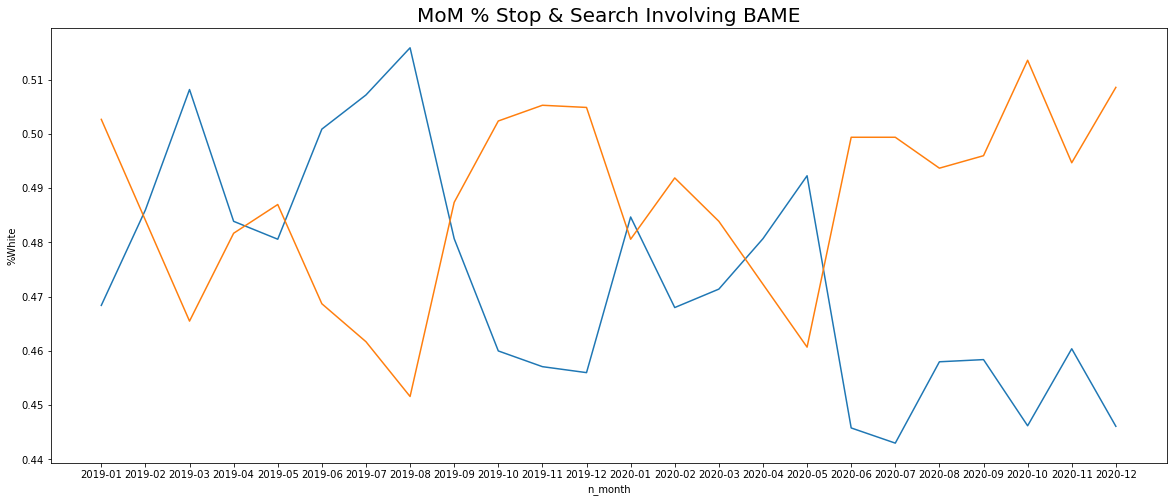

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8))
plt.title("MoM % Stop & Search Involving BAME", fontsize = 20)
g=sns.lineplot(x = r0B['n_month'], y = r0B['%BAME'], data=r0B,markers=True)
h=sns.lineplot(x = r0W['n_month'], y = r0W['%White'], data=r0W,markers=True)

### In case of stop & search involving BAME 82% S&Ss are not part of police operations

In [108]:
a=data.groupby(['n_self_def_eth','n_part_of_policing_operation'])['n_type'].count().reset_index()
a1=data.groupby(['n_self_def_eth'])['n_type'].count().reset_index()
a1=a1.rename(columns={'n_type':'n_type_tot'})
a=a.merge(a1,on=['n_self_def_eth'],how='left')
a['%perc_s&s']=round(a['n_type']/a['n_type_tot'],4)
a=a.drop(['n_type','n_type_tot'],axis=1)
a

,n_self_def_eth,n_part_of_policing_operation,%perc_s&s
0,BAME,Not Known,0.1718
1,BAME,Not Part Of Policing Op,0.8109
2,BAME,Part Of Policing Op,0.0173
3,Not Known,Not Known,0.4858
4,Not Known,Not Part Of Policing Op,0.4946
5,Not Known,Part Of Policing Op,0.0196
6,White,Not Known,0.3909
7,White,Not Part Of Policing Op,0.5772
8,White,Part Of Policing Op,0.0319


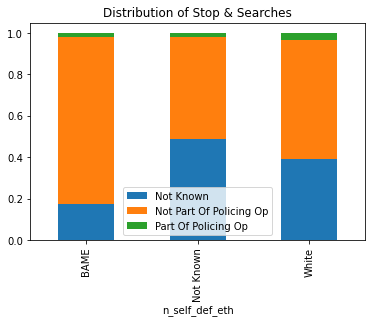

In [109]:
a=a.rename(columns={'%perc_s&s':''})
a=a.pivot_table(index=['n_self_def_eth'],
                      columns=['n_part_of_policing_operation'], aggfunc='mean').reset_index()
a.columns = a.columns.to_series().str.join('')

g=a.plot( 
  x = 'n_self_def_eth',  
  kind = 'bar',  
  stacked = True,  
  title = 'Distribution of Stop & Searches',  
  mark_right = True) 

### In case of stop & search involving BAME which are not part of police operations, times when object of search was found is significantly lesser

In [110]:
a=data.loc[data.n_part_of_policing_operation=='Not Part Of Policing Op'].groupby(['n_self_def_eth','n_outcome_lnkd_to_obj_of_search'])['n_type'].count().reset_index()
a1=data.loc[data.n_part_of_policing_operation=='Not Part Of Policing Op'].groupby(['n_self_def_eth'])['n_type'].count().reset_index()


a1=a1.rename(columns={'n_type':'n_type_tot'})
a=a.merge(a1,on=['n_self_def_eth'],how='left')
a['%perc_s&s']=round(a['n_type']/a['n_type_tot'],4)
a=a.drop(['n_type','n_type_tot'],axis=1)

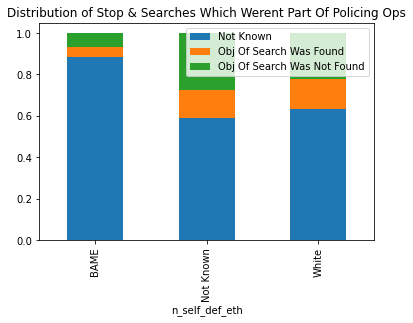

In [111]:
a=a.rename(columns={'%perc_s&s':''})
a=a.pivot_table(index=['n_self_def_eth'],
                      columns=['n_outcome_lnkd_to_obj_of_search'], aggfunc='mean').reset_index()
a.columns = a.columns.to_series().str.join('')

g=a.plot( 
  x = 'n_self_def_eth',  
  kind = 'bar',  
  stacked = True,  
  title = 'Distribution of Stop & Searches Which Werent Part Of Policing Ops',  
  mark_right = True) 

### Cases were slightly more for BAME when no action was taken

In [112]:
a=data.loc[data.n_part_of_policing_operation=='Not Part Of Policing Op'].groupby(['n_self_def_eth','n_outcome'])['n_type'].count().reset_index()
a1=data.loc[data.n_part_of_policing_operation=='Not Part Of Policing Op'].groupby(['n_self_def_eth'])['n_type'].count().reset_index()


a1=a1.rename(columns={'n_type':'n_type_tot'})
a=a.merge(a1,on=['n_self_def_eth'],how='left')
a['%perc_s&s']=round(a['n_type']/a['n_type_tot'],4)
a=a.drop(['n_type','n_type_tot'],axis=1)

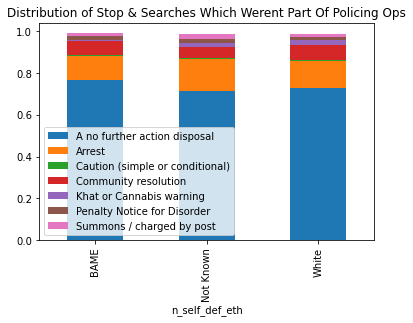

In [113]:
a=a.rename(columns={'%perc_s&s':''})
a=a.pivot_table(index=['n_self_def_eth'],
                      columns=['n_outcome'], aggfunc='mean').reset_index()
a.columns = a.columns.to_series().str.join('')

g=a.plot( 
  x = 'n_self_def_eth',  
  kind = 'bar',  
  stacked = True,  
  title = 'Distribution of Stop & Searches Which Werent Part Of Policing Ops',  
  mark_right = True) 

In [132]:
r1=data.loc[(data.n_part_of_policing_operation=='Not Part Of Policing Op') &
           (data.n_outcome_lnkd_to_obj_of_search=='Obj Of Search Was Not Found')].groupby(['n_place','n_self_def_eth'])['n_type'].count().reset_index()
r11=data.loc[(data.n_part_of_policing_operation=='Not Part Of Policing Op') &
            (data.n_outcome_lnkd_to_obj_of_search=='Obj Of Search Was Not Found')].groupby(['n_place'])['n_type'].count().reset_index()


r11=r11.rename(columns={'n_type':'n_type_tot'})
r1=r1.merge(r11,on='n_place',how='left')
r1['n_type']=round(r1['n_type']/r1['n_type_tot'],4)
r1=r1.drop(['n_type_tot'],axis=1)
r1=r1.rename(columns={'n_type':''})
r1=r1.pivot_table(index=['n_place'],
                      columns=['n_self_def_eth'], aggfunc='mean').reset_index()
r1.columns = r1.columns.to_series().str.join('')

r1=r1.set_index('n_place')
r1.index.name = None
r1=r1.loc[:,['BAME']]
r1.head()

KeyError: "None of [Index(['BAME'], dtype='object')] are in the [columns]"

In [115]:
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter

ax = r1.plot(kind='barh', figsize=(8, 20), zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Stop & Search Freq", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Constabulary", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

TypeError: no numeric data to plot